# Lista de ejercicios y guía de trabajo:

## Exercici 1

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.

## Exercici 2

Fes un informe complet del dataset:

- Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
- Troba quantes dades faltants hi ha per columna.
- Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
- Fes una taula de les aerolínies amb més endarreriments acumulats.
- Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
- Aporta allò que consideris rellevant.

## Exercici 3

Exporta el dataset net i amb les noves columnes a Excel.

# 1. Carga de los datos en un Datraframe. 

### Resolución parcial del ejercicio 1

En un primer lugar, siguiendo el ejercicio 1, procedo a cargar la base de datos, que puede ser encontrada en la web:

- https://www.kaggle.com/datasets/giovamata/airlinedelaycauses

Además, siguiendo la guía del Campus, procederé a reducir el dataset de manera aleatoria. Una vez hecho esto, podré empezar con los siguientes apartados contenidos en los ejercicios 1 y 2

In [1]:
import pandas as pd

flights = pd.read_csv('DelayedFlights.csv')

print(len(flights.index)) #Manera 1 para ver el número de registros
print(flights.shape[0]) #Manera 2 para ver el número de registros

flights[:5]

1936758
1936758


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Como puede observarse, tenemos cerca de 2M de registros. Siguiendo la guía proporcionada en el campus, procedo a reducir de manera aleatoria el número de registros hasta llegar a 200.000. Además, haré uso de la opción **random_state** para que los resultados sean reproducibles.

In [2]:

pd.set_option('display.max_columns', None) #Permite ver todas las columnas del dataset

reduced_flights=flights.sample(n = 200000, random_state=1) #La opción de random_state nos permite que los resultados sean reproducibles
print(reduced_flights.shape[0])
reduced_flights[:10]

200000


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1750755,6516830,2008,12,19,5,1332.0,1320,1436.0,1430,WN,3858,N700GS,64.0,70.0,49.0,6.0,12.0,CLE,BWI,314,7.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1074983,3577214,2008,6,17,2,1731.0,1720,2013.0,1955,CO,268,N54241,342.0,335.0,316.0,18.0,11.0,EWR,LAS,2227,8.0,18.0,0,N,0,11.0,0.0,7.0,0.0,0.0
46126,148177,2008,1,27,7,735.0,645,918.0,815,YV,7343,N27185,103.0,90.0,54.0,63.0,50.0,ORD,BNA,409,4.0,45.0,0,N,0,63.0,0.0,0.0,0.0,0.0
327441,1035260,2008,2,13,3,1333.0,1230,1515.0,1438,9E,2927,87189E,102.0,128.0,80.0,37.0,63.0,ORF,DTW,529,7.0,15.0,0,N,0,0.0,0.0,0.0,0.0,37.0
1363177,4599044,2008,8,12,2,1359.0,1346,1517.0,1447,FL,301,N267AT,198.0,181.0,178.0,30.0,13.0,ATL,DEN,1199,5.0,15.0,0,N,0,13.0,0.0,17.0,0.0,0.0
1872102,6834114,2008,12,26,5,1507.0,1410,1531.0,1440,MQ,3980,N803MQ,84.0,90.0,61.0,51.0,57.0,SDF,ORD,286,5.0,18.0,0,N,0,0.0,0.0,26.0,0.0,25.0
406995,1259252,2008,3,28,5,803.0,755,1050.0,1045,WN,1493,N256WN,167.0,170.0,143.0,5.0,8.0,FLL,ISP,1093,4.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1665135,6127853,2008,11,14,5,1131.0,1112,1336.0,1302,OO,6765,N905SW,125.0,110.0,96.0,34.0,19.0,DEN,BZN,525,4.0,25.0,0,N,0,0.0,0.0,15.0,0.0,19.0
1696711,6279895,2008,11,5,3,1843.0,1830,1956.0,1930,MQ,3017,N806MQ,73.0,60.0,38.0,26.0,13.0,LAX,FAT,209,6.0,29.0,0,N,0,0.0,0.0,13.0,0.0,13.0
195403,635801,2008,2,12,2,1234.0,1220,1455.0,1455,WN,1769,N769SW,81.0,95.0,66.0,0.0,14.0,BNA,DTW,457,9.0,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# 2. Exploración inicial de los datos

### Resolución de los ejercicios 1 y 2 (parcial)

Lo tenemos! El siguiente paso es realizar una exploración inicial de los datos que nos permita entender con qué estamos trabajando, así como detectar posibles necesidades (creación de nuevas columnas, eliminación de columnas y / o registros innecesarios...)

Haremos un sondeo inicial y un resumen estadístico general (Ejercicio 1 y 2) y miraremos cuantos datos faltan en cada columna (Ejercicio 2). Así mismo, detectaremos qué posibles columnas podrían ser necesarias. 


In [3]:
pd.set_option('display.max_columns', None)

reduced_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1750755 to 1526456
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Year               200000 non-null  int64  
 2   Month              200000 non-null  int64  
 3   DayofMonth         200000 non-null  int64  
 4   DayOfWeek          200000 non-null  int64  
 5   DepTime            200000 non-null  float64
 6   CRSDepTime         200000 non-null  int64  
 7   ArrTime            199208 non-null  float64
 8   CRSArrTime         200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  FlightNum          200000 non-null  int64  
 11  TailNum            199999 non-null  object 
 12  ActualElapsedTime  199080 non-null  float64
 13  CRSElapsedTime     199982 non-null  float64
 14  AirTime            199080 non-null  float64
 15  ArrDelay           199080 non-null  float64


La función **DataFrame.info** nos permite obtener información de las distintas columnas de nuestro Dataframe. En nuestro caso, podemos ver que nuestra base de datos contiene **30 columnas**.

A simple vista, podemos ver varias cosas:

1. Para cada registro, tenemos una columna indicando el año, una columna indicando el mes y dos columnas indicando los días (tanto del mes como de la semana). No obstante, **no tenemos ninguna columna que indique la fecha total (YMD)**

2. Para los análisis de este ejercicio, me fijaré principalmente en los vuelos en si y el retraso ocasionado durante estos. Es por ello que **no usaré las columnas de TaxiIn y TaxiOut** (que contienen información sobre los minutos de embarque en la salida y la llegada).

3. La columna con mayor importancia será la de **ArrDelay**: Resume el retraso de llegada al destino del avión. Este será el dato con el que trabajaré principalmente. 

Antes de seguir, realizaré un análisis estadístico inicial de todas las columnas

In [4]:
reduced_flights.describe(include="all")

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.000000e+05,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199208.000000,200000.000000,200000,200000.000000,199999,199080.000000,199982.000000,199080.00000,199080.000000,200000.000000,200000,200000,200000.000000,199208.000000,199942.000000,200000.000000,200000,200000.000000,128790.000000,128790.000000,128790.000000,128790.000000,128790.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5269,NaN,NaN,NaN,NaN,NaN,296,299,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N676SW,NaN,NaN,NaN,NaN,NaN,ATL,ATL,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39080,NaN,115,NaN,NaN,NaN,NaN,NaN,13363,11265,NaN,NaN,NaN,NaN,199923,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.340323e+06,2008.0,6.107705,15.746745,3.986185,1518.978965,1467.862965,1611.790696,1634.930270,NaN,2181.460630,NaN,133.279908,134.349746,108.27390,42.196253,43.241600,NaN,NaN,766.311470,6.824455,18.203859,0.000385,NaN,0.004215,19.210335,3.696871,15.055633,0.082708,25.225872
std,2.061940e+06,0.0,3.475174,8.775472,1.993493,450.167462,424.509597,547.142583,463.900273,NaN,1945.408768,NaN,71.963520,71.335257,68.56642,56.785793,53.446295,NaN,NaN,574.883162,5.334471,14.317953,0.019618,NaN,0.064786,43.390607,21.240432,33.606039,1.864354,42.617552
min,0.000000e+00,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,17.000000,-21.000000,2.00000,-59.000000,6.000000,NaN,NaN,24.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.522139e+06,2008.0,3.000000,8.000000,2.000000,1204.000000,1135.000000,1317.000000,1325.000000,NaN,610.000000,NaN,80.000000,82.000000,58.00000,9.000000,12.000000,NaN,NaN,338.000000,4.000000,10.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.240750e+06,2008.0,6.000000,16.000000,4.000000,1546.000000,1510.000000,1717.000000,1707.000000,NaN,1537.000000,NaN,116.000000,117.000000,90.00000,24.000000,24.000000,NaN,NaN,607.000000,6.000000,14.000000,0.000000,NaN,0.000000,2.000000,0.000000,2.000000,0.000000,8.000000
75%,4.963111e+06,2008.0,9.000000,23.000000,6.000000,1901.000000,1815.000000,2031.000000,2014.000000,NaN,3419.000000,NaN,165.000000,165.000000,137.00000,56.000000,53.000000,NaN,NaN,998.000000,8.000000,21.000000,0.000000,NaN,0.000000,21.000000,0.000000,14.000000,0.000000,33.000000


La función **DataFrame.describe** genera una serie de estadísticos descriptivos para todas las columnas del dataframe. En estos casos, podemos ver varias cosas:

1. Como ya se apreciaba con dataframe.info, algunas columnas tienen datos no numéricos: **UniqueCarrier** indica la aerolínea, mientras que **TailNum** indica el número de la cola. **Origin** y **Dest** indican las ciudades de origen y destino, y el **CancellationCode** indica el código de cancelación (en caso de que proceda)

2. Observamos que los contajes difieren entre las distintas columnas. **Esto es indicativo de que, para algunos registros, faltan datos**. Lo veremos a continuación en detalle. 

3. Todos los registros son del año 2008, pero encontramos registros para los distintos meses y días. 

4. Las medias de la columna de **ActualElapsedTime** (tiempo actual del vuelo) y **CRSElapsedTime** (tiempo calculado del vuelo) son similares, e incluso algo menores en la primera de ellas. De manera preliminar, esto nos indica que los retrasos no se deberían a un mayor tiempo de vuelo, pero podremos mirarlo en detalle.

5. La media de la columna **ArrDelay** es de 42 minutos, con una desviación estándar de 52 minutos. Así mismo, el percentil 50 está en 24 minutos, indicando que la mayoría de retrasos son de poco tiempo. Pero, **¡¡Cuidado!!**: podemos apreciar que tenemos datos negativos en esta columna (de hasta -59). Estos registros **NO** nos interesan, ya que no reflejan retrasos globales en la llegada de los aviones: así pues, estos registros podrán ser eliminados.


In [5]:
reduced_flights.isna().sum() #Datos que faltan por columna

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                792
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  1
ActualElapsedTime      920
CRSElapsedTime          18
AirTime                920
ArrDelay               920
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 792
TaxiOut                 58
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71210
WeatherDelay         71210
NASDelay             71210
SecurityDelay        71210
LateAircraftDelay    71210
dtype: int64

Finalmente, podemos observar cuantos datos faltan para cada una de las columnas. En general, para los que hay más ausencia de datos es para las últimas columnas, que indican cuantos minutos del retraso se deben a cada uno de los posibles factores (tiempo, seguridad, compañía...)

# 3. Filtraje de los datos, creación de nuevas columnas y eliminación de columnas / registros

### Resolución parcial del ejercicio 2

En el apartado anterior ya hemos podido echar un vistazo inicial, lo que nos permite establecer líneas de actuación:

1. **Creación de una columna** que incluya la fecha del vuelo - (Ejercicio 2)
2. **Creación de dos columnas** que incluyen la velocidad real del vuelo (Distance/ActualElapsedTime) y la velocidad esperada del vuelo (Distance/CRSElapsedTime). **Ojo!**, esto incluye algo más de tiempo que en la columna de "Airtime" (incluye maniobras de despegue, aterrizaje, etc.). No obstante, aunque la velocidad real del vuelo sería algo menor, me ha parecido más interesante de cara a comparar entre el pronóstico y el resultado (ya que en el caso de "Airtime" no se nos indica pronóstico).  - (Ejercicio 2)
3. **Eliminación de columnas** que no serán utilizadas en estos análisis (TaxiIn y TaxiOut)
4. **Eliminación de registros** con un ArrDelay negativo (ya que esos vuelos no han llegado con retraso al aeropuerto, sino que se encuentran en la base de datos por otros motivos.). 



**1, 2. Creación de nuevas columnas**

In [6]:
reduced_flights.rename(columns = {'DayofMonth':'Day'}, inplace = True) #Necesitamos cambiar el nombre de la columna del día del mes

reduced_flights['Fecha_completa'] = pd.to_datetime(reduced_flights[['Year', 'Month', 'Day']])

reduced_flights[:10] #Hemos añadido una columna con la fecha completa. 

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Fecha_completa
1750755,6516830,2008,12,19,5,1332.0,1320,1436.0,1430,WN,3858,N700GS,64.0,70.0,49.0,6.0,12.0,CLE,BWI,314,7.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-12-19
1074983,3577214,2008,6,17,2,1731.0,1720,2013.0,1955,CO,268,N54241,342.0,335.0,316.0,18.0,11.0,EWR,LAS,2227,8.0,18.0,0,N,0,11.0,0.0,7.0,0.0,0.0,2008-06-17
46126,148177,2008,1,27,7,735.0,645,918.0,815,YV,7343,N27185,103.0,90.0,54.0,63.0,50.0,ORD,BNA,409,4.0,45.0,0,N,0,63.0,0.0,0.0,0.0,0.0,2008-01-27
327441,1035260,2008,2,13,3,1333.0,1230,1515.0,1438,9E,2927,87189E,102.0,128.0,80.0,37.0,63.0,ORF,DTW,529,7.0,15.0,0,N,0,0.0,0.0,0.0,0.0,37.0,2008-02-13
1363177,4599044,2008,8,12,2,1359.0,1346,1517.0,1447,FL,301,N267AT,198.0,181.0,178.0,30.0,13.0,ATL,DEN,1199,5.0,15.0,0,N,0,13.0,0.0,17.0,0.0,0.0,2008-08-12
1872102,6834114,2008,12,26,5,1507.0,1410,1531.0,1440,MQ,3980,N803MQ,84.0,90.0,61.0,51.0,57.0,SDF,ORD,286,5.0,18.0,0,N,0,0.0,0.0,26.0,0.0,25.0,2008-12-26
406995,1259252,2008,3,28,5,803.0,755,1050.0,1045,WN,1493,N256WN,167.0,170.0,143.0,5.0,8.0,FLL,ISP,1093,4.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-03-28
1665135,6127853,2008,11,14,5,1131.0,1112,1336.0,1302,OO,6765,N905SW,125.0,110.0,96.0,34.0,19.0,DEN,BZN,525,4.0,25.0,0,N,0,0.0,0.0,15.0,0.0,19.0,2008-11-14
1696711,6279895,2008,11,5,3,1843.0,1830,1956.0,1930,MQ,3017,N806MQ,73.0,60.0,38.0,26.0,13.0,LAX,FAT,209,6.0,29.0,0,N,0,0.0,0.0,13.0,0.0,13.0,2008-11-05
195403,635801,2008,2,12,2,1234.0,1220,1455.0,1455,WN,1769,N769SW,81.0,95.0,66.0,0.0,14.0,BNA,DTW,457,9.0,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-02-12


In [7]:
reduced_flights['Vel_Vuelo'] = reduced_flights['Distance'] / reduced_flights['ActualElapsedTime']

reduced_flights[:10] #Añadimos una segunda columna con la velocidad de vuelo

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Fecha_completa,Vel_Vuelo
1750755,6516830,2008,12,19,5,1332.0,1320,1436.0,1430,WN,3858,N700GS,64.0,70.0,49.0,6.0,12.0,CLE,BWI,314,7.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-12-19,4.906250
1074983,3577214,2008,6,17,2,1731.0,1720,2013.0,1955,CO,268,N54241,342.0,335.0,316.0,18.0,11.0,EWR,LAS,2227,8.0,18.0,0,N,0,11.0,0.0,7.0,0.0,0.0,2008-06-17,6.511696
46126,148177,2008,1,27,7,735.0,645,918.0,815,YV,7343,N27185,103.0,90.0,54.0,63.0,50.0,ORD,BNA,409,4.0,45.0,0,N,0,63.0,0.0,0.0,0.0,0.0,2008-01-27,3.970874
327441,1035260,2008,2,13,3,1333.0,1230,1515.0,1438,9E,2927,87189E,102.0,128.0,80.0,37.0,63.0,ORF,DTW,529,7.0,15.0,0,N,0,0.0,0.0,0.0,0.0,37.0,2008-02-13,5.186275
1363177,4599044,2008,8,12,2,1359.0,1346,1517.0,1447,FL,301,N267AT,198.0,181.0,178.0,30.0,13.0,ATL,DEN,1199,5.0,15.0,0,N,0,13.0,0.0,17.0,0.0,0.0,2008-08-12,6.055556
1872102,6834114,2008,12,26,5,1507.0,1410,1531.0,1440,MQ,3980,N803MQ,84.0,90.0,61.0,51.0,57.0,SDF,ORD,286,5.0,18.0,0,N,0,0.0,0.0,26.0,0.0,25.0,2008-12-26,3.404762
406995,1259252,2008,3,28,5,803.0,755,1050.0,1045,WN,1493,N256WN,167.0,170.0,143.0,5.0,8.0,FLL,ISP,1093,4.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-03-28,6.544910
1665135,6127853,2008,11,14,5,1131.0,1112,1336.0,1302,OO,6765,N905SW,125.0,110.0,96.0,34.0,19.0,DEN,BZN,525,4.0,25.0,0,N,0,0.0,0.0,15.0,0.0,19.0,2008-11-14,4.200000
1696711,6279895,2008,11,5,3,1843.0,1830,1956.0,1930,MQ,3017,N806MQ,73.0,60.0,38.0,26.0,13.0,LAX,FAT,209,6.0,29.0,0,N,0,0.0,0.0,13.0,0.0,13.0,2008-11-05,2.863014
195403,635801,2008,2,12,2,1234.0,1220,1455.0,1455,WN,1769,N769SW,81.0,95.0,66.0,0.0,14.0,BNA,DTW,457,9.0,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-02-12,5.641975


In [8]:
reduced_flights['Vel_Vuelo_CRS'] = reduced_flights['Distance'] / reduced_flights['CRSElapsedTime']

reduced_flights[:10] #Una tercera columna con la velocidad estimada

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Fecha_completa,Vel_Vuelo,Vel_Vuelo_CRS
1750755,6516830,2008,12,19,5,1332.0,1320,1436.0,1430,WN,3858,N700GS,64.0,70.0,49.0,6.0,12.0,CLE,BWI,314,7.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-12-19,4.906250,4.485714
1074983,3577214,2008,6,17,2,1731.0,1720,2013.0,1955,CO,268,N54241,342.0,335.0,316.0,18.0,11.0,EWR,LAS,2227,8.0,18.0,0,N,0,11.0,0.0,7.0,0.0,0.0,2008-06-17,6.511696,6.647761
46126,148177,2008,1,27,7,735.0,645,918.0,815,YV,7343,N27185,103.0,90.0,54.0,63.0,50.0,ORD,BNA,409,4.0,45.0,0,N,0,63.0,0.0,0.0,0.0,0.0,2008-01-27,3.970874,4.544444
327441,1035260,2008,2,13,3,1333.0,1230,1515.0,1438,9E,2927,87189E,102.0,128.0,80.0,37.0,63.0,ORF,DTW,529,7.0,15.0,0,N,0,0.0,0.0,0.0,0.0,37.0,2008-02-13,5.186275,4.132812
1363177,4599044,2008,8,12,2,1359.0,1346,1517.0,1447,FL,301,N267AT,198.0,181.0,178.0,30.0,13.0,ATL,DEN,1199,5.0,15.0,0,N,0,13.0,0.0,17.0,0.0,0.0,2008-08-12,6.055556,6.624309
1872102,6834114,2008,12,26,5,1507.0,1410,1531.0,1440,MQ,3980,N803MQ,84.0,90.0,61.0,51.0,57.0,SDF,ORD,286,5.0,18.0,0,N,0,0.0,0.0,26.0,0.0,25.0,2008-12-26,3.404762,3.177778
406995,1259252,2008,3,28,5,803.0,755,1050.0,1045,WN,1493,N256WN,167.0,170.0,143.0,5.0,8.0,FLL,ISP,1093,4.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-03-28,6.544910,6.429412
1665135,6127853,2008,11,14,5,1131.0,1112,1336.0,1302,OO,6765,N905SW,125.0,110.0,96.0,34.0,19.0,DEN,BZN,525,4.0,25.0,0,N,0,0.0,0.0,15.0,0.0,19.0,2008-11-14,4.200000,4.772727
1696711,6279895,2008,11,5,3,1843.0,1830,1956.0,1930,MQ,3017,N806MQ,73.0,60.0,38.0,26.0,13.0,LAX,FAT,209,6.0,29.0,0,N,0,0.0,0.0,13.0,0.0,13.0,2008-11-05,2.863014,3.483333
195403,635801,2008,2,12,2,1234.0,1220,1455.0,1455,WN,1769,N769SW,81.0,95.0,66.0,0.0,14.0,BNA,DTW,457,9.0,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-02-12,5.641975,4.810526


**3. Eliminación de columnas no utilizadas**

In [9]:
reduced_flights_final = reduced_flights.drop(columns=['TaxiIn', 'TaxiOut']) #Creo otro dataset distinto, para poder volver atras. 
reduced_flights_final[:3]

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Fecha_completa,Vel_Vuelo,Vel_Vuelo_CRS
1750755,6516830,2008,12,19,5,1332.0,1320,1436.0,1430,WN,3858,N700GS,64.0,70.0,49.0,6.0,12.0,CLE,BWI,314,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-12-19,4.906250,4.485714
1074983,3577214,2008,6,17,2,1731.0,1720,2013.0,1955,CO,268,N54241,342.0,335.0,316.0,18.0,11.0,EWR,LAS,2227,0,N,0,11.0,0.0,7.0,0.0,0.0,2008-06-17,6.511696,6.647761
46126,148177,2008,1,27,7,735.0,645,918.0,815,YV,7343,N27185,103.0,90.0,54.0,63.0,50.0,ORD,BNA,409,0,N,0,63.0,0.0,0.0,0.0,0.0,2008-01-27,3.970874,4.544444


**4. Eliminación de registros**

Como he comentado anteriormente, algunos registros parecen tener datos negativos en la columna de retraso de la llegada. Vamos a mirarlo en detalle y ponerle solución

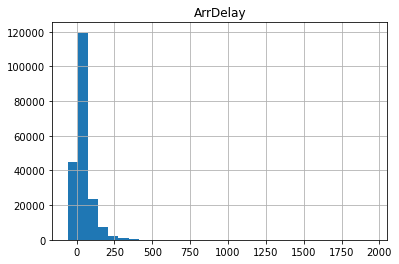

In [10]:
reduced_flights_final.hist("ArrDelay", bins=30);

In [11]:
pd.cut(reduced_flights_final['ArrDelay'], 30).value_counts().sort_index()

(-61.01, 8.0]        48446
(8.0, 75.0]         116407
(75.0, 142.0]        23305
(142.0, 209.0]        7054
(209.0, 276.0]        2379
(276.0, 343.0]         827
(343.0, 410.0]         327
(410.0, 477.0]         153
(477.0, 544.0]          60
(544.0, 611.0]          35
(611.0, 678.0]          17
(678.0, 745.0]          12
(745.0, 812.0]          12
(812.0, 879.0]          12
(879.0, 946.0]           8
(946.0, 1013.0]          6
(1013.0, 1080.0]         5
(1080.0, 1147.0]         7
(1147.0, 1214.0]         3
(1214.0, 1281.0]         1
(1281.0, 1348.0]         3
(1348.0, 1415.0]         0
(1415.0, 1482.0]         0
(1482.0, 1549.0]         0
(1549.0, 1616.0]         0
(1616.0, 1683.0]         0
(1683.0, 1750.0]         0
(1750.0, 1817.0]         0
(1817.0, 1884.0]         0
(1884.0, 1951.0]         1
Name: ArrDelay, dtype: int64

Como ya se había visto en los datos preliminares, hay datos negativos en esta columna. De hecho, al menos 48.446 registros tienen valores menores a 8 minutos.

Como me interesa trabajar con los retrasos, voy a eliminar todos los registros menores o iguales que 0. 

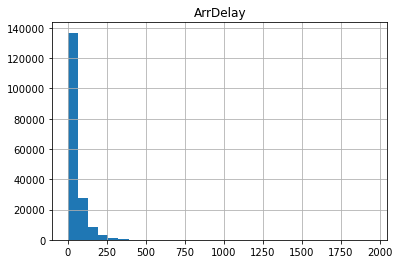

In [12]:
reduced_flights_final = reduced_flights_final.drop(reduced_flights_final[reduced_flights_final.ArrDelay <= 0].index)

reduced_flights_final.hist("ArrDelay", bins=30);

In [13]:
pd.cut(reduced_flights_final['ArrDelay'], 30).value_counts().sort_index()

(-0.95, 66.0]       137527
(66.0, 131.0]        27368
(131.0, 196.0]        8357
(196.0, 261.0]        2861
(261.0, 326.0]        1030
(326.0, 391.0]         409
(391.0, 456.0]         162
(456.0, 521.0]          85
(521.0, 586.0]          38
(586.0, 651.0]          24
(651.0, 716.0]          11
(716.0, 781.0]          13
(781.0, 846.0]           9
(846.0, 911.0]          12
(911.0, 976.0]           8
(976.0, 1041.0]          7
(1041.0, 1106.0]         4
(1106.0, 1171.0]         4
(1171.0, 1236.0]         3
(1236.0, 1301.0]         2
(1301.0, 1366.0]         2
(1366.0, 1431.0]         0
(1431.0, 1496.0]         0
(1496.0, 1561.0]         0
(1561.0, 1626.0]         0
(1626.0, 1691.0]         0
(1691.0, 1756.0]         0
(1756.0, 1821.0]         0
(1821.0, 1886.0]         0
(1886.0, 1951.0]         1
Name: ArrDelay, dtype: int64

In [14]:
print(reduced_flights_final['ArrDelay'].min())

1.0


Como puede verse, ahora el valor mínimo de la columna retrasos en la llegada se sitúa en 1 minuto. Así mismo, encontramos que 137527 registros corresponden a retrasos de aproximadamente una hora o menos: Es decir, **la mayoría de los retrasos son relativamente breves** 

# 4. Análisis de los datos

### Resolución del ejercicio 2

Ahora que tenemos el dataset lìmpio, así como una idea general de los datos e información que contiene, procederemos a plantearnos una serie de preguntas y darles respuesta:

1. **¿Qué aerolíneas acumulan un mayor número de retrasos?** Creación de una nueva tabla - Ejercicio 2. 
2. **Cuáles son los vuelos con mayores retrasos? ¿Y los más largos? ¿Y que cumplan ambos criterios?** - Ejercicio 2

Además de las preguntas planteadas en el ejercicio, me planteo algunas otras: ¿tiene relación la fecha del vuelo con los retrasos? ¿Están relacionados los retrasos en las llegadas con los retrasos en los despegues? ¿Cuantos vuelos se cancelan o desvían? 

**1. Aerolíneas con mayor número de retrasos**

WN    33723
AA    18064
MQ    13500
UA    12638
OO    12632
DL    10590
XE     9703
CO     8817
US     8706
EV     7697
NW     7439
FL     6777
YV     6474
OH     5094
B6     4981
9E     4909
AS     3590
F9     2723
HA      739
AQ       61
Name: UniqueCarrier, dtype: int64


<AxesSubplot:>

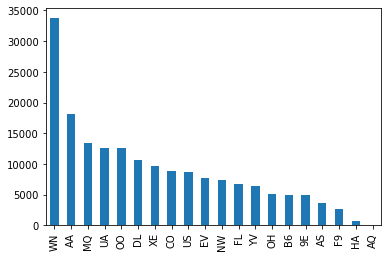

In [15]:
compañías=reduced_flights_final["UniqueCarrier"].value_counts() #Creación de una tabla "compañías"
print(compañías)
compañías.plot(kind="bar")

Observamos que la compañía WN es la que acumula un mayor número de registros (33.723). Con aproximadamente la mitad, le siguen las compañías AA, MQ, UA. Sería interesante tener datos de la cantidad total de vuelos que operan estas compañías, para hacernos una idea del porcentaje - pero con este dataset no resulta posible.

Hemos visto las compañías con mayor número de retrasos. Pero ¿estas compañías acumulan también los retrasos más largos? Lo comprobamos:

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='UniqueCarrier'>

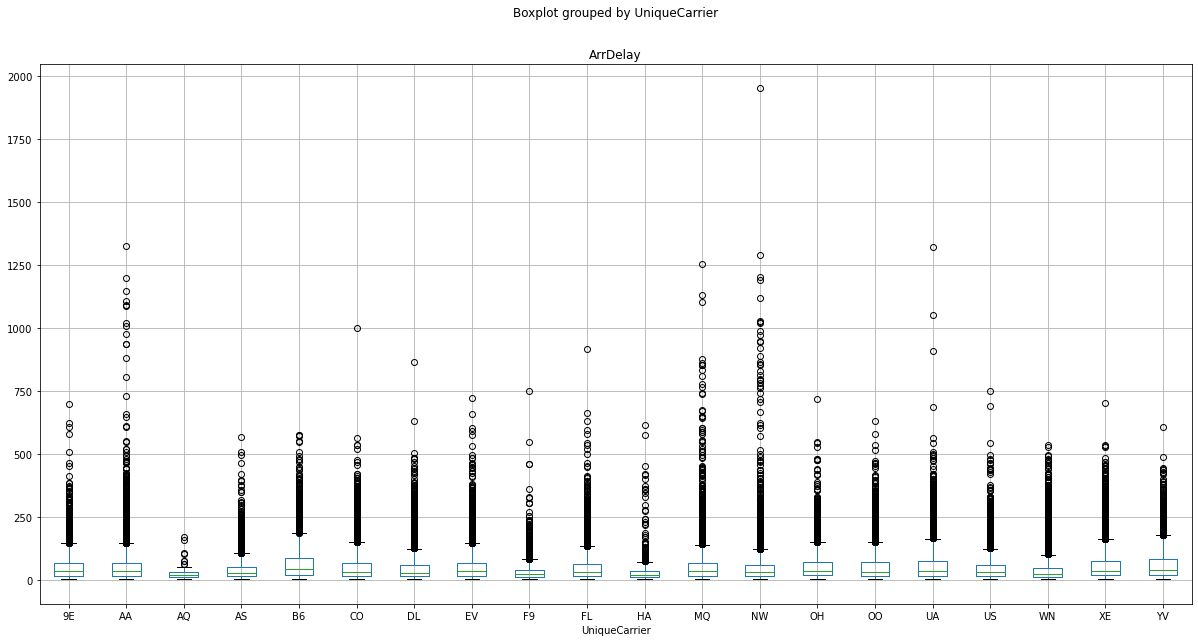

In [17]:
reduced_flights_final.boxplot(column="ArrDelay", by="UniqueCarrier", figsize=(20,10))

WN es la compañía con mayor cantidad de retrasos registrados: no obstante, estos retrasos no son de los más largos, y parecen distribuirse por debajo de los 500 minutos. En general, todos los boxplots se encuentran abajo del gráfico, indicando nuevamente que la mayoría de retrasos son de pocos minutos y tan solo algunos "registros / valores atípicos" son aquellos con retrasos más largos

**2. ¿Qué vuelos tienen más retrasos / son más largos / ambas?**

Una posible explicación a los resultados anteriores es que las compañias con más retrasos podrían estar operando vuelos más largos y que estos, a su vez, dan lugar a mayores retrasos. Veamos esto en detalle:

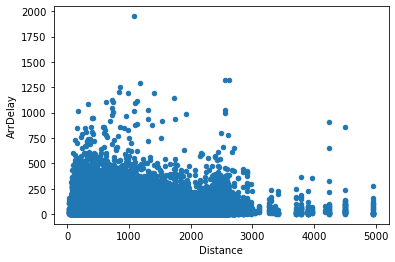

In [18]:
reduced_flights_final.plot.scatter(x="Distance", y="ArrDelay"); #Distancia vs Retraso en la llegada

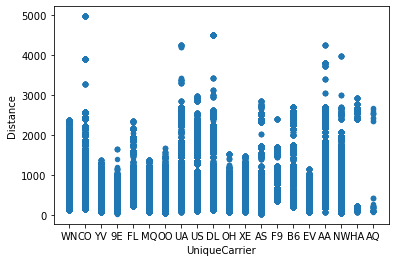

In [19]:
reduced_flights_final.plot.scatter(x="UniqueCarrier", y="Distance"); #Distancia según cada compañía

A groso modo, no parece existir una correlación entre la distancia y los retrasos en las llegadas. La compañía con mayor número de retrasos (WN) no es la que tiene registrados los vuelos más largos. Del mismo modo, los retrasos parecen acumularse en en los vuelos cortos (que posiblemente son los más mayoritarios). 

Veamos cuáles son los vuelos más largos y cuáles son los vuelos con más retrasos:

In [20]:
reduced_flights_final.sort_values(by="ArrDelay",ascending=False)[:20]

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Fecha_completa,Vel_Vuelo,Vel_Vuelo_CRS
839306,2832617,2008,5,6,2,2.0,1530,254.0,1823,NW,1107,N333NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,0,N,0,1951.0,0.0,0.0,0.0,0.0,2008-05-06,6.308140,6.271676
1222506,4099781,2008,7,30,3,1241.0,1445,2110.0,2305,AA,284,N392AA,329.0,320.0,302.0,1325.0,1316.0,HNL,LAX,2556,0,N,0,0.0,0.0,9.0,0.0,1316.0,2008-07-30,7.768997,7.987500
1464385,5039477,2008,9,3,3,1828.0,2045,304.0,502,UA,68,N548UA,336.0,317.0,315.0,1322.0,1303.0,LIH,LAX,2615,0,N,0,0.0,0.0,19.0,0.0,1303.0,2008-09-03,7.782738,8.249211
1025817,3432027,2008,6,16,1,1044.0,1317,1532.0,1803,NW,610,N301US,168.0,166.0,139.0,1289.0,1287.0,GEG,MSP,1175,0,N,0,1165.0,0.0,2.0,0.0,122.0,2008-06-16,6.994048,7.078313
1702698,6308375,2008,11,30,7,938.0,1300,1313.0,1620,MQ,4508,N848MQ,155.0,140.0,128.0,1253.0,1238.0,MEM,MIA,860,0,N,0,2.0,0.0,15.0,0.0,1236.0,2008-11-30,5.548387,6.142857
323499,1022387,2008,2,19,2,652.0,1110,942.0,1339,NW,1077,N987US,170.0,149.0,123.0,1203.0,1182.0,TPA,IND,838,0,N,0,1076.0,0.0,21.0,0.0,106.0,2008-02-19,4.929412,5.624161
349082,1095815,2008,2,7,4,805.0,1150,1116.0,1520,AA,2036,N236AA,131.0,150.0,112.0,1196.0,1215.0,SLC,DFW,988,0,N,0,1061.0,0.0,0.0,0.0,135.0,2008-02-07,7.541985,6.586667
517183,1620103,2008,3,2,7,258.0,705,809.0,1220,NW,804,N593NW,191.0,195.0,159.0,1189.0,1193.0,SEA,MSP,1399,0,N,0,5.0,0.0,0.0,0.0,1184.0,2008-03-02,7.324607,7.174359
146567,481458,2008,1,6,7,1017.0,1445,1547.0,2040,AA,336,N5ECAA,210.0,235.0,196.0,1147.0,1172.0,SNA,ORD,1726,0,N,0,1068.0,0.0,0.0,0.0,79.0,2008-01-06,8.219048,7.344681
504065,1580617,2008,3,12,3,700.0,1250,1029.0,1540,MQ,3894,N511AE,149.0,110.0,91.0,1129.0,1090.0,MTJ,DFW,722,0,N,0,1090.0,0.0,39.0,0.0,0.0,2008-03-12,4.845638,6.563636


El máximo retraso registrado es de 1951 minutos, en un vuelo de 1000km. En el top 20, todos los vuelos tienen retrasos de más de 1000 minutos (~17h)

In [21]:
reduced_flights_final.sort_values(by="Distance", ascending=False)[:20]

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Fecha_completa,Vel_Vuelo,Vel_Vuelo_CRS
1065857,3554229,2008,6,15,7,1712.0,1335,2245.0,1810,CO,15,N68061,693.0,635.0,641.0,275.0,217.0,EWR,HNL,4962,0,N,0,0.0,73.0,58.0,0.0,144.0,2008-06-15,7.160173,7.814173
556380,1742566,2008,3,20,4,1453.0,1320,2026.0,1820,CO,15,N67058,693.0,660.0,641.0,126.0,93.0,EWR,HNL,4962,0,N,0,26.0,0.0,33.0,0.0,67.0,2008-03-20,7.160173,7.518182
874458,2962775,2008,5,21,3,1510.0,1335,1948.0,1810,CO,15,N76054,638.0,635.0,607.0,98.0,95.0,EWR,HNL,4962,0,N,0,95.0,0.0,3.0,0.0,0.0,2008-05-21,7.777429,7.814173
173676,566384,2008,1,15,2,1334.0,1320,1932.0,1920,CO,15,N66051,658.0,660.0,617.0,12.0,14.0,EWR,HNL,4962,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-15,7.541033,7.518182
1928078,6982536,2008,12,16,2,1359.0,1335,2022.0,1935,CO,15,N76054,683.0,660.0,637.0,47.0,24.0,EWR,HNL,4962,0,N,0,24.0,0.0,23.0,0.0,0.0,2008-12-16,7.265007,7.518182
1258159,4207645,2008,7,11,5,1408.0,1335,1815.0,1810,CO,15,N66056,607.0,635.0,581.0,5.0,33.0,EWR,HNL,4962,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-07-11,8.174629,7.814173
1621084,5911413,2008,10,17,5,1348.0,1335,1823.0,1810,CO,15,N69059,635.0,635.0,582.0,13.0,13.0,EWR,HNL,4962,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-10-17,7.814173,7.814173
1927699,6981771,2008,12,17,3,2143.0,2055,1225.0,1120,CO,14,N66051,582.0,565.0,531.0,65.0,48.0,HNL,EWR,4962,0,N,0,0.0,0.0,17.0,0.0,48.0,2008-12-17,8.525773,8.782301
1074476,3575873,2008,6,1,7,1510.0,1335,1949.0,1810,CO,15,N66057,639.0,635.0,605.0,99.0,95.0,EWR,HNL,4962,0,N,0,4.0,0.0,4.0,0.0,91.0,2008-06-01,7.765258,7.814173
1520323,5363287,2008,9,19,5,1347.0,1335,1818.0,1810,CO,15,N76062,631.0,635.0,605.0,8.0,12.0,EWR,HNL,4962,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-09-19,7.863708,7.814173


Los vuelos más largos llegan a casi 5000km, siendo casi todos del aeropuerto EWR (Newark, NJ, USA) a HNL (Honolulu, HI, USA)

In [22]:
reduced_flights_final.sort_values(by=['Distance', 'ArrDelay'], ascending=[False, False])[:20] #Ordenados según la distancia y, después, según los retrasos

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Fecha_completa,Vel_Vuelo,Vel_Vuelo_CRS
1065857,3554229,2008,6,15,7,1712.0,1335,2245.0,1810,CO,15,N68061,693.0,635.0,641.0,275.0,217.0,EWR,HNL,4962,0,N,0,0.0,73.0,58.0,0.0,144.0,2008-06-15,7.160173,7.814173
1926817,6980183,2008,12,19,5,1407.0,1335,2217.0,1935,CO,15,N67058,790.0,660.0,634.0,162.0,32.0,EWR,HNL,4962,0,N,0,0.0,32.0,130.0,0.0,0.0,2008-12-19,6.281013,7.518182
556380,1742566,2008,3,20,4,1453.0,1320,2026.0,1820,CO,15,N67058,693.0,660.0,641.0,126.0,93.0,EWR,HNL,4962,0,N,0,26.0,0.0,33.0,0.0,67.0,2008-03-20,7.160173,7.518182
1925804,6978778,2008,12,21,7,1523.0,1335,2126.0,1935,CO,15,N69059,663.0,660.0,635.0,111.0,108.0,EWR,HNL,4962,0,N,0,0.0,15.0,3.0,0.0,93.0,2008-12-21,7.484163,7.518182
1074476,3575873,2008,6,1,7,1510.0,1335,1949.0,1810,CO,15,N66057,639.0,635.0,605.0,99.0,95.0,EWR,HNL,4962,0,N,0,4.0,0.0,4.0,0.0,91.0,2008-06-01,7.765258,7.814173
874458,2962775,2008,5,21,3,1510.0,1335,1948.0,1810,CO,15,N76054,638.0,635.0,607.0,98.0,95.0,EWR,HNL,4962,0,N,0,95.0,0.0,3.0,0.0,0.0,2008-05-21,7.777429,7.814173
556381,1742567,2008,3,21,5,1345.0,1320,1936.0,1820,CO,15,N66051,711.0,660.0,655.0,76.0,25.0,EWR,HNL,4962,0,N,0,25.0,0.0,51.0,0.0,0.0,2008-03-21,6.978903,7.518182
1927699,6981771,2008,12,17,3,2143.0,2055,1225.0,1120,CO,14,N66051,582.0,565.0,531.0,65.0,48.0,HNL,EWR,4962,0,N,0,0.0,0.0,17.0,0.0,48.0,2008-12-17,8.525773,8.782301
556356,1742519,2008,3,4,2,2328.0,2245,1409.0,1310,CO,14,N66056,581.0,565.0,557.0,59.0,43.0,HNL,EWR,4962,0,N,0,43.0,0.0,16.0,0.0,0.0,2008-03-04,8.540448,8.782301
1928078,6982536,2008,12,16,2,1359.0,1335,2022.0,1935,CO,15,N76054,683.0,660.0,637.0,47.0,24.0,EWR,HNL,4962,0,N,0,24.0,0.0,23.0,0.0,0.0,2008-12-16,7.265007,7.518182


Y, con el comando anterior, ordenamos en un primer lugar según la distancia y, posteriormente, según el retraso. 

**3. Otras preguntas planteadas** ¿Qué relación tiene la fecha con la cantidad de registros de retrasos? ¿Están relacionados los retrasos en las llegadas con los retrasos en los despegues? ¿Cuantos vuelos se cancelan o desvían?

En un primer lugar, procedamos a mirar la **relación entre las fechas y los retrasos:**

1     16778
2     17754
3     18752
4     14199
5     14121
6     19069
7     17107
8     14929
9      8548
10     9179
11     9488
12    18933
Name: Month, dtype: int64


<AxesSubplot:>

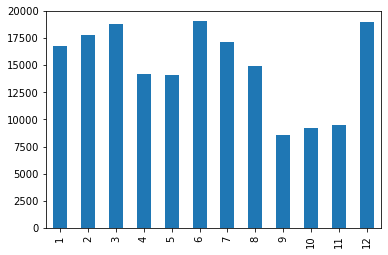

In [23]:
#Retrasos según el mes del año

meses=reduced_flights_final['Month'].value_counts().sort_index()
print(meses)
meses.plot(kind="bar")

2008-12-23    1061
2008-12-01    1006
2008-01-02     999
2008-12-22     993
2008-12-19     983
              ... 
2008-09-23     161
2008-11-28     154
2008-09-20     147
2008-08-31     141
2008-11-27     111
Name: Fecha_completa, Length: 366, dtype: int64


<AxesSubplot:>

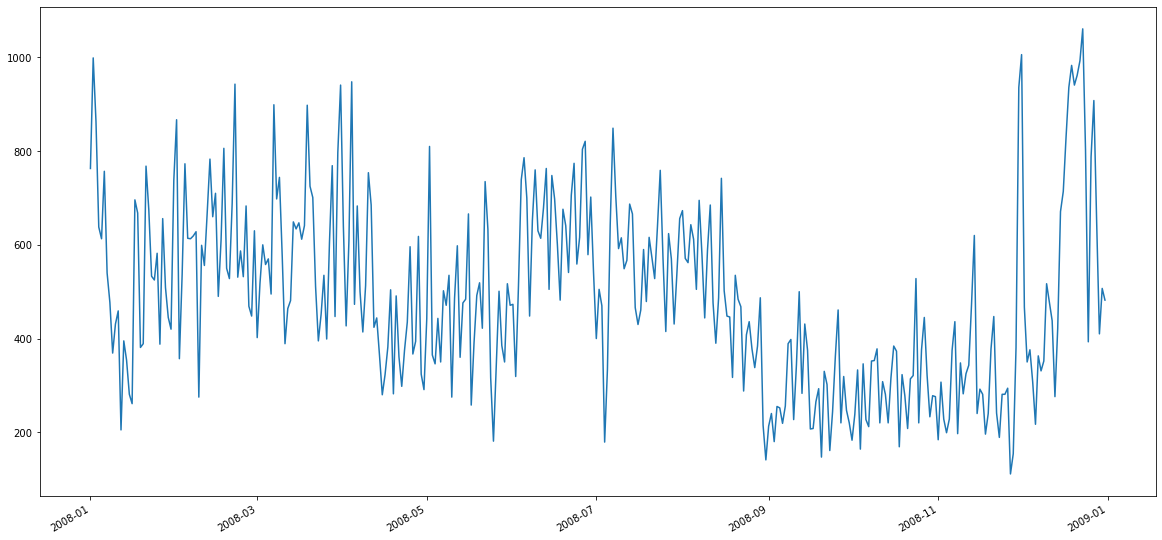

In [30]:
retrasos_fecha=reduced_flights_final['Fecha_completa'].value_counts()
print(retrasos_fecha)
retrasos_fecha.plot(figsize=(20,10))

En general,  parece que los meses de septiembre, octubre y noviembre fueron los que menos cantidad de retrasos registraron. Esto se aprecia también cuando miramos las fechas a lo largo de todo el año. No obstante, se observa una alta variabilidad entre los días de un mismo mes, aparentemente caótica, aunque podría ser que presentara algún tipo de tendencia cíclica (serían necesarios otros tipos de análisis para corroborarlo). Por último, se observan dos picos muy destacados en el mes de diciembre.

Miramos ahora la relación entre los minutos de retraso (promedio) y los meses / fechas completas. 

<AxesSubplot:xlabel='Month'>

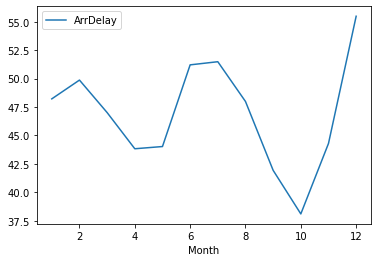

In [33]:
reduced_flights_final[['Month','ArrDelay']].groupby(['Month']).mean().plot()

<AxesSubplot:xlabel='Fecha_completa'>

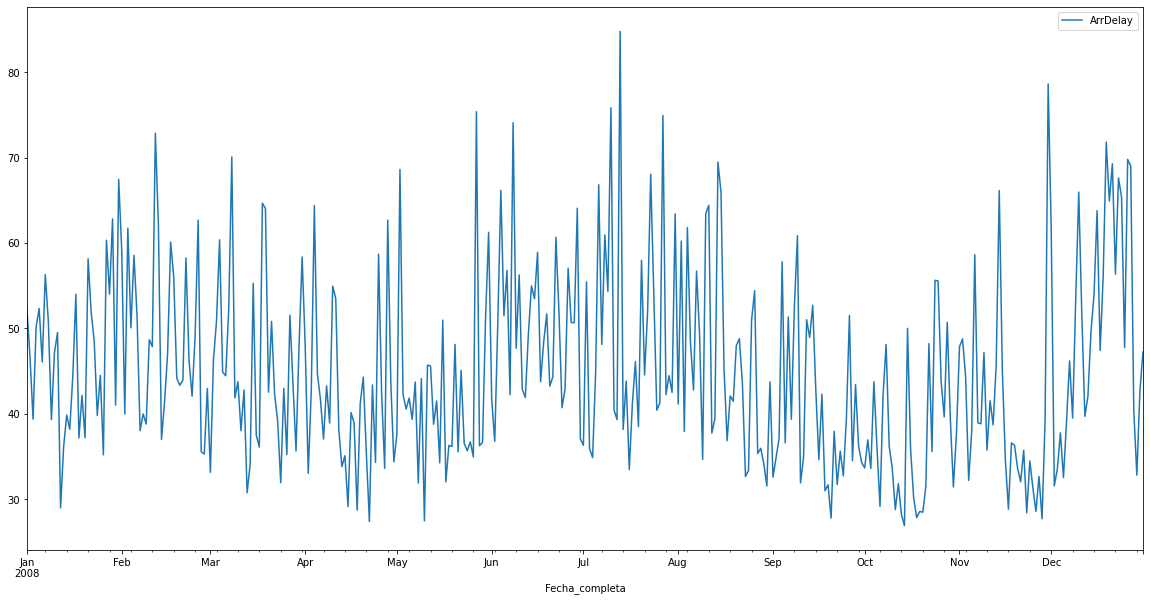

In [34]:
reduced_flights_final[['Fecha_completa','ArrDelay']].groupby(['Fecha_completa']).mean().plot(figsize=(20,10))

Como puede observarse en los gráficos anteriores, el mes con retrasos más largos parece ser claramente diciembre; si miramos a nivel más detallado, observamos una variabilidad enorme dependiendo del día. 

A continuación, miraré la **relación que existe entre los retrasos en las llegadas y en los retrasos de los despegues**

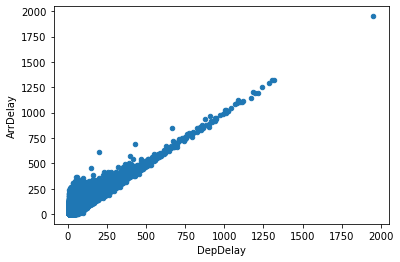

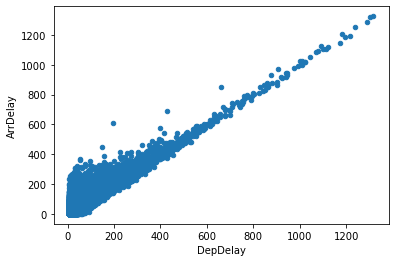

In [38]:
reduced_flights_final.plot.scatter(x="DepDelay", y="ArrDelay");

reduced_flights_1 = reduced_flights_final[reduced_flights_final['DepDelay']<1900]
reduced_flights_1.plot.scatter(x="DepDelay", y="ArrDelay");

Como puede observarse, parece existir una **relación lineal bastante clara** entre los retrasos del despegue y los retrasos en la llegada. No obstante, si observamos en detalle, esta relación es muy clara en los retrasos que son más largos: sin embargo, **cuando los retrasos son más cortos (sobre todo para los vuelos con retrasos de menos de 400 - 200 minutos), la correlación parece perder algo de fuerza**. Es decir, los retrasos cortos (especialmente aquellos de menos de 400 minutos) no siempre se deben en su totalidad a un retraso en el despegue del avión, sino que pueden haber otros factores implicados

Finalmente, vamos a echar un ojo a los **vuelos cancelados y desviados.**

In [39]:
cancelados=reduced_flights_final["Cancelled"].value_counts()
print(cancelados)

desviados=reduced_flights_final["Diverted"].value_counts()
print(desviados)

0    178780
1        77
Name: Cancelled, dtype: int64
0    178014
1       843
Name: Diverted, dtype: int64


Para mi sorpresa, tan solo se cancelaron **77 vuelos**, mientras que **843** fueron desviados.

Teniendo en cuenta la magnitud del dataset, podrían mirarse muchas otras cosas y plantearse multitud de preguntas. He decidido seleccionar unas pocas, pero está claro que este dataset tienen un gran potencial para realizar análisis y buscar tendencias a lo largo del tiempo

# 5. Guardado de los datos

### Resolución del ejercicio 3

Una vez resueltos todos los apartados indicados en el ejercicio, procedo a guardar el dataset final ya filtrado. Subo el fichero a esta misma carpeta de Github

In [41]:
reduced_flights_final.to_excel('vuelos_limpio.xlsx')